<a href="https://colab.research.google.com/github/abhhiixxhek/Sales-Forecasting-Analysis/blob/main/Sales_Forecasting_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Forecasting Analysis

In [32]:
#import the librraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker

In [33]:
df = pd.read_csv('sales_data.csv', engine='python', encoding='latin-1')

<br><br>
**Take a look at the dataset**
<br><br>

In [34]:
df.head() #show five datas from the top

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [35]:
df.info() #show the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [36]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']) #convert ORDERDATE to pandas datetime format

In [37]:
df.info() #show the info, ORDERDATE become datetime64[ns] format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [38]:
df.sort_values(by = ['ORDERDATE'], inplace = True) #sorting data by ORDERDATE
df.set_index('ORDERDATE', inplace = True) #setting the index to be the ORDERDATE (it will hep a lot later on)

In [39]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.00,3,5151.00,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2003-01-06,10100,50,67.80,2,3390.00,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2003-01-06,10100,22,86.51,4,1903.22,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
2003-01-06,10100,49,34.47,1,1689.03,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
2003-01-09,10101,45,31.20,3,1404.00,Shipped,1,1,2003,Vintage Cars,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small


<br><br>
**Check if there is any null data or not**
<br><br>

In [40]:
print(df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


<br><br>
**Since there are lot of null values in ADDRESSLINE2, STATE, POSTALCODE, COUNTRY, and TERRITORY, the I will drop them. COUNTRY and CITY will represent the order geographical information**
<br><br>

In [41]:
to_drop = ['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY']
df = df.drop(to_drop, axis = 1)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.00,3,5151.00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Medium
2003-01-06,10100,50,67.80,2,3390.00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Medium
2003-01-06,10100,22,86.51,4,1903.22,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Small
2003-01-06,10100,49,34.47,1,1689.03,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,USA,Young,Valarie,Small
2003-01-09,10101,45,31.20,3,1404.00,Shipped,1,1,2003,Vintage Cars,33,S24_1937,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,Germany,Keitel,Roland,Small


In [42]:
print(df.isnull().sum()) #checking again if there are null values

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [43]:
#show the unique value of each column
for c in df.columns:
    print(f'Number of {c} unique values: {df[c].nunique()}')

Number of ORDERNUMBER unique values: 307
Number of QUANTITYORDERED unique values: 58
Number of PRICEEACH unique values: 1016
Number of ORDERLINENUMBER unique values: 18
Number of SALES unique values: 2763
Number of STATUS unique values: 6
Number of QTR_ID unique values: 4
Number of MONTH_ID unique values: 12
Number of YEAR_ID unique values: 3
Number of PRODUCTLINE unique values: 7
Number of MSRP unique values: 80
Number of PRODUCTCODE unique values: 109
Number of CUSTOMERNAME unique values: 92
Number of PHONE unique values: 91
Number of ADDRESSLINE1 unique values: 92
Number of CITY unique values: 73
Number of COUNTRY unique values: 19
Number of CONTACTLASTNAME unique values: 77
Number of CONTACTFIRSTNAME unique values: 72
Number of DEALSIZE unique values: 3


In [44]:
df.describe() # describing the data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


<br><br>
**Finding out 20 Most Valuable Customers**
<br><br>
These customers exhibit a pattern of purchasing larger quantities or higher-priced items compared to others, thereby making them essential assets for the company's financial success.
<br><br>

In [45]:
top_customer = df.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(20) #sorting the customers as per the sales
top_customer = top_customer[['SALES']].round(3) #round off the sales value up to 3 decimal places
top_customer.reset_index(inplace = True) #reset the index to add the customer name into dataframe

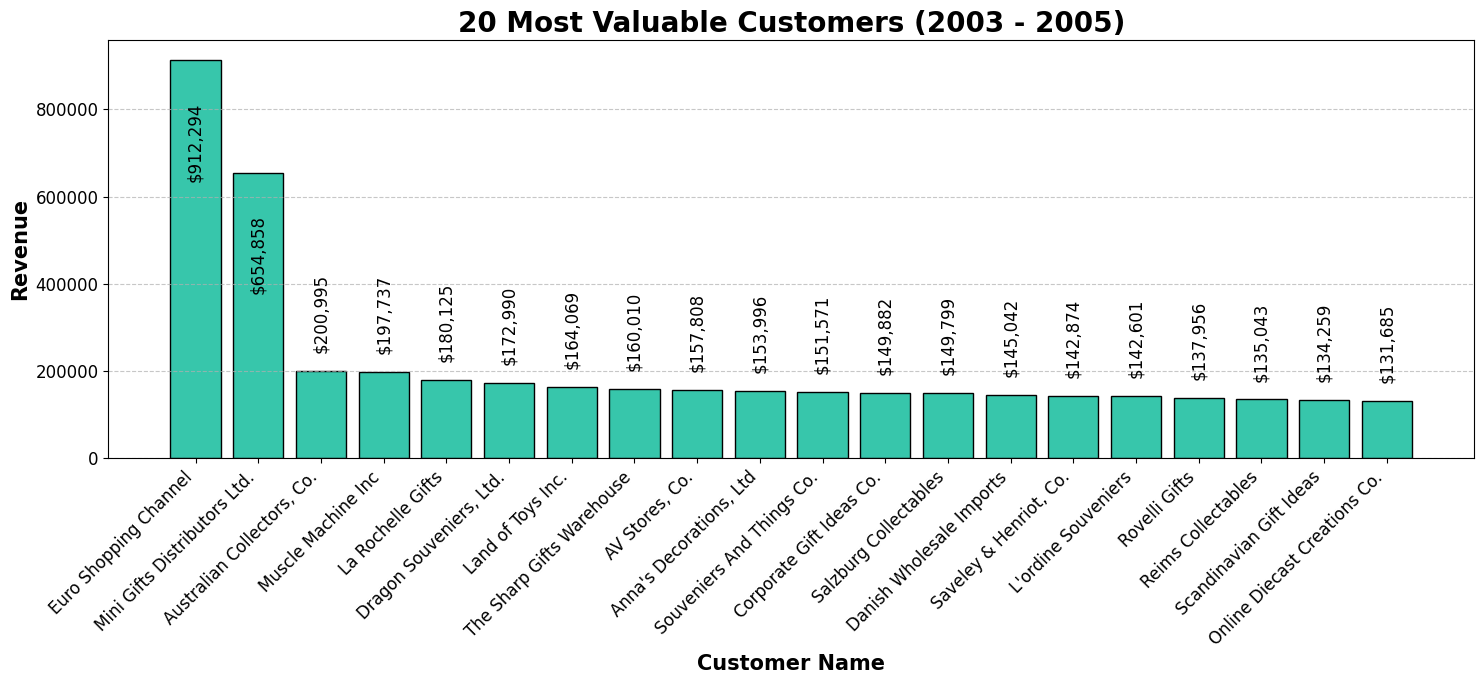

In [46]:
plt.figure(figsize=(15, 7))  # Adjusted height for better visibility
plt.title('20 Most Valuable Customers (2003 - 2005)', fontsize=20, fontweight='bold')  # Increased title font size and added bold
plt.bar(top_customer['CUSTOMERNAME'], top_customer['SALES'], color='#37C6AB', edgecolor='black', linewidth=1)
plt.xlabel('Customer Name', fontsize=15, fontweight='bold')  # Added bold font weight to axis labels
plt.ylabel('Revenue', fontsize=15, fontweight='bold')  # Added bold font weight to axis labels
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotated x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added horizontal grid lines with reduced opacity

for k, v in top_customer['SALES'].items():
    if v > 600000:
        plt.text(k, v - 270000, '${:,.0f}'.format(v), fontsize=12, rotation=90, color='black', ha='center')
    else:
        plt.text(k, v + 50000, '${:,.0f}'.format(v), fontsize=12, rotation=90, color='black', ha='center')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<br><br>
**Finding out 20 Highest Revenue by Country**
<br>
Here are the Top 20 Country which generated the highest revenue
<br><br>

In [47]:
top_country = df.groupby(['COUNTRY']).sum().sort_values('SALES', ascending = False).head(20) #sort the country as per the sales
top_country = top_country[['SALES']].round(3) #round off teh sales value up to 3 decimal places
top_country.reset_index(inplace = True) #reset the index to add the country into dataframe

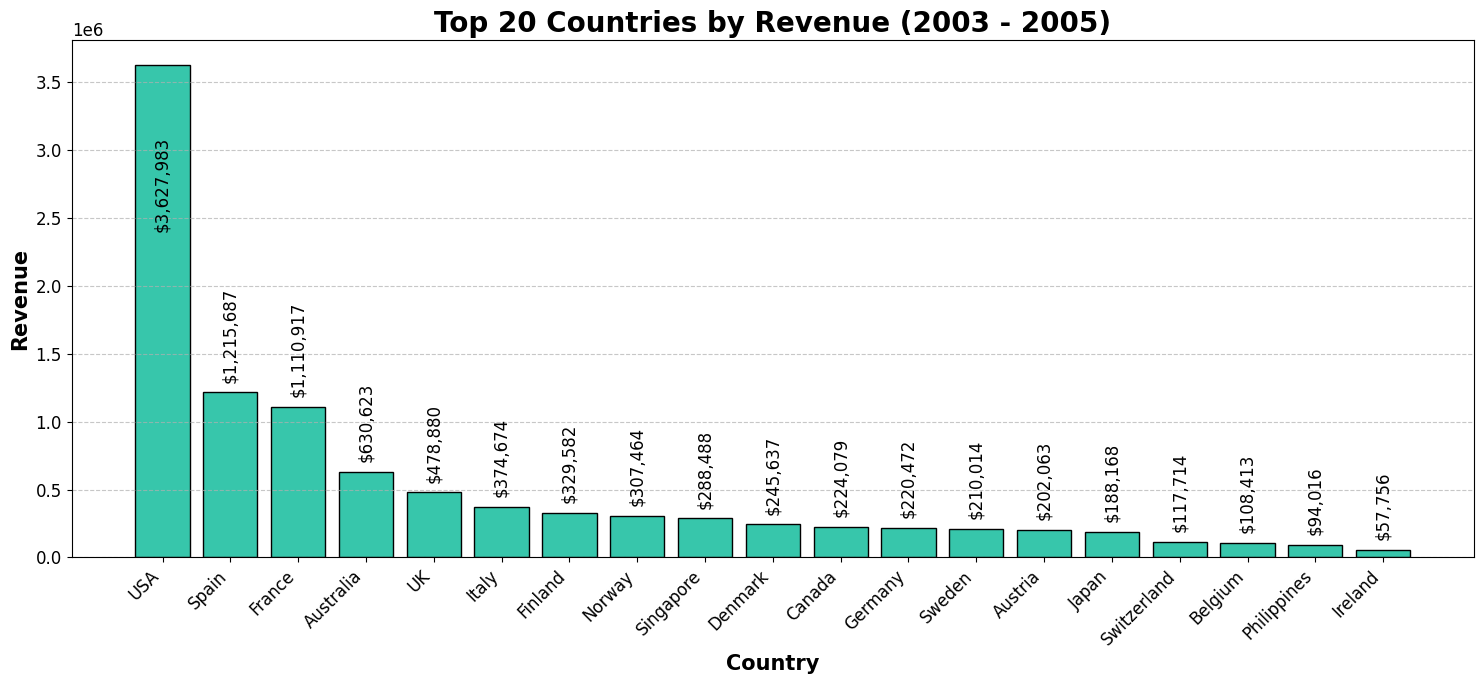

In [48]:
plt.figure(figsize=(15, 7))  # Adjusted height for better visibility
plt.title('Top 20 Countries by Revenue (2003 - 2005)', fontsize=20, fontweight='bold')  # Increased title font size and added bold
plt.bar(top_country['COUNTRY'], top_country['SALES'], color='#37C6AB', edgecolor='black', linewidth=1)
plt.xlabel('Country', fontsize=15, fontweight='bold')  # Added bold font weight to axis labels
plt.ylabel('Revenue', fontsize=15, fontweight='bold')  # Added bold font weight to axis labels
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotated x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added horizontal grid lines with reduced opacity

for k, v in top_country['SALES'].items():
    if v > 3000000:
        plt.text(k, v - 1200000, '${:,.0f}'.format(v), fontsize=12, rotation=90, color='black', ha='center')
    else:
        plt.text(k, v + 100000, '${:,.0f}'.format(v), fontsize=12, rotation=90, color='black', ha='center')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<br><br>
**Find out 20 Highest Revenue by City**
<br>
Here are the Top 20 City which generated the highest revenue
<br><br>

In [49]:
top_city = df.groupby(['CITY']).sum().sort_values('SALES', ascending = False).head(20) #sort the city as per the sales
top_city = top_city[['SALES']].round(3) #round off the sales value up to 3 decimal places
top_city.reset_index(inplace = True) #reset the index

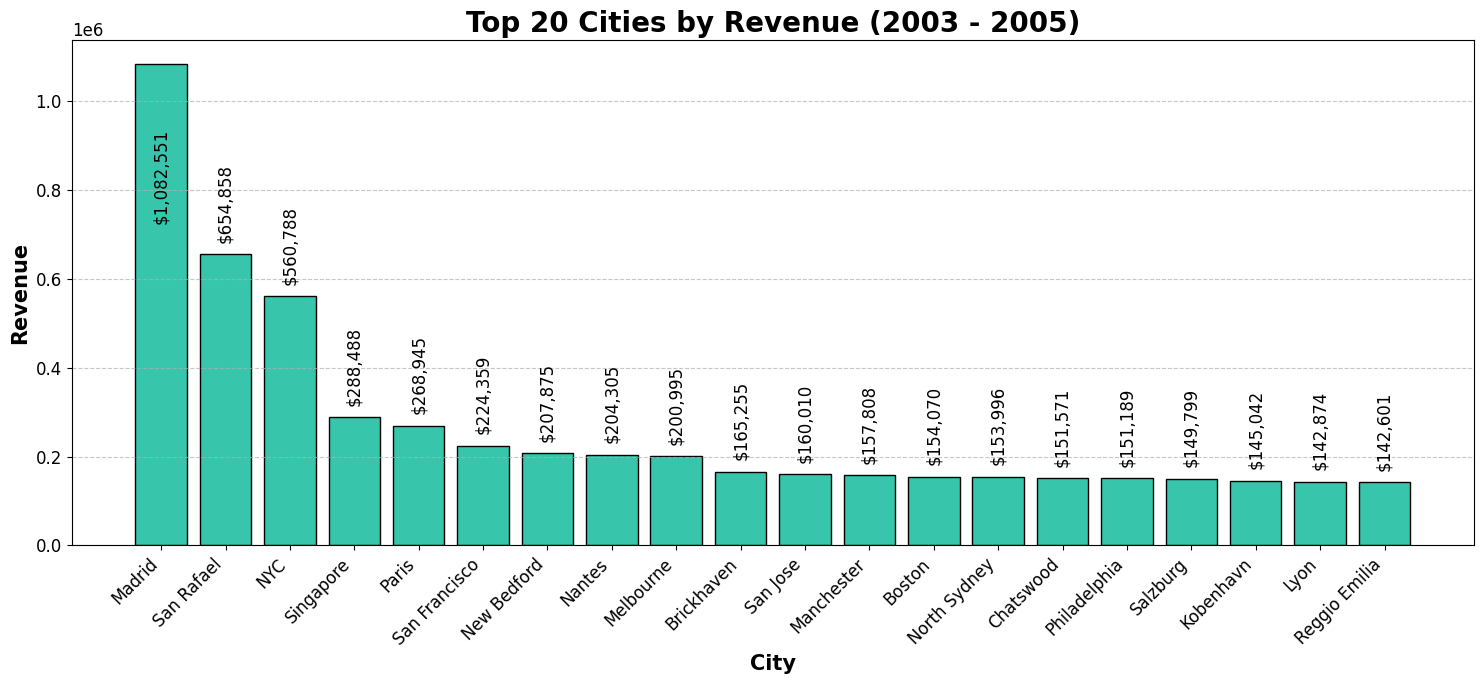

In [50]:
plt.figure(figsize=(15, 7))  # Adjusted height for better visibility
plt.title('Top 20 Cities by Revenue (2003 - 2005)', fontsize=20, fontweight='bold')  # Increased title font size and added bold
plt.bar(top_city['CITY'], top_city['SALES'], color='#37C6AB', edgecolor='black', linewidth=1)
plt.xlabel('City', fontsize=15, fontweight='bold')  # Added bold font weight to axis labels
plt.ylabel('Revenue', fontsize=15, fontweight='bold')  # Added bold font weight to axis labels
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotated x-axis labels for better readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added horizontal grid lines with reduced opacity

for k, v in top_city['SALES'].items():
    if v > 800000:
        plt.text(k, v - 350000, '${:,.0f}'.format(v), fontsize=12, rotation=90, color='black', ha='center')
    else:
        plt.text(k, v + 35000, '${:,.0f}'.format(v), fontsize=12, rotation=90, color='black', ha='center')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<br><br>
**Which products give the highest revenue**
<br><br>

In [51]:
top_product = df.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False) #sort the categories as per the sales
top_product = top_product[['SALES']] #keep only the sales column in dataframe
top_product.reset_index(inplace = True) #reset index
total_revenue_product = top_product['SALES'].sum() #find the total revenue generated as per product line
total_revenue_product = str(int(total_revenue_product)) #convert the total revenue from float to int and then to string
total_revenue_product = '$' + total_revenue_product #adding '$' sign before the value

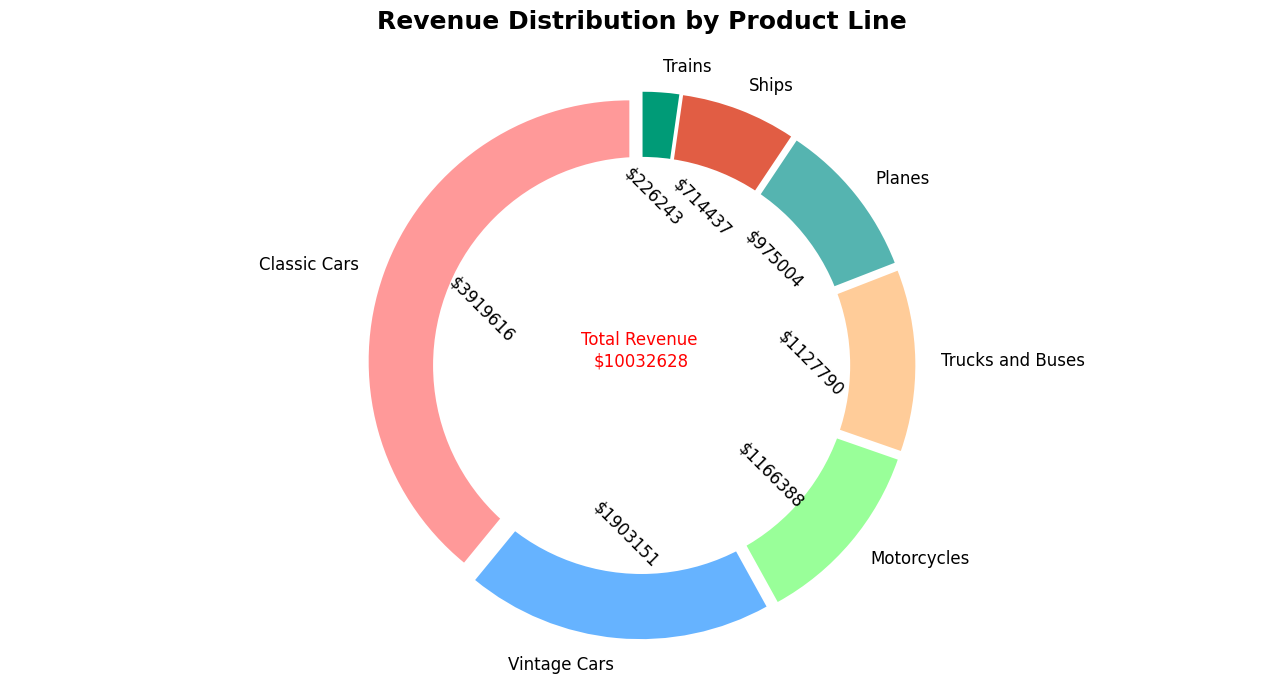

In [52]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 6

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '${v:d}'.format(v=val)
    return my_format

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#55B4B0', '#E15D44', '#009B77']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
pie1 = ax1.pie(top_product['SALES'], colors=colors, labels=top_product['PRODUCTLINE'], autopct=autopct_format(top_product['SALES']), startangle=90, explode=explode)
fraction_text_list = pie1[2]
for text in fraction_text_list:
    text.set_rotation(315)

center_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax1.axis('equal')
label = ax1.annotate('Total Revenue \n' + str(total_revenue_product), color='red', xy=(0, 0), fontsize=12, ha='center')

plt.title('Revenue Distribution by Product Line\n', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


<br><br>
**Seen on the figure above, that Classic Cars generated the highest revenue of about 3919616 dollar
<br>
And the total revenue generated by all these product line 10032628 dollar**
<br><br>

<br><br>
**Correlation Features**
<br>
Plotting a correlation matrix to see the overview of how the features are related to one another
<br><br>

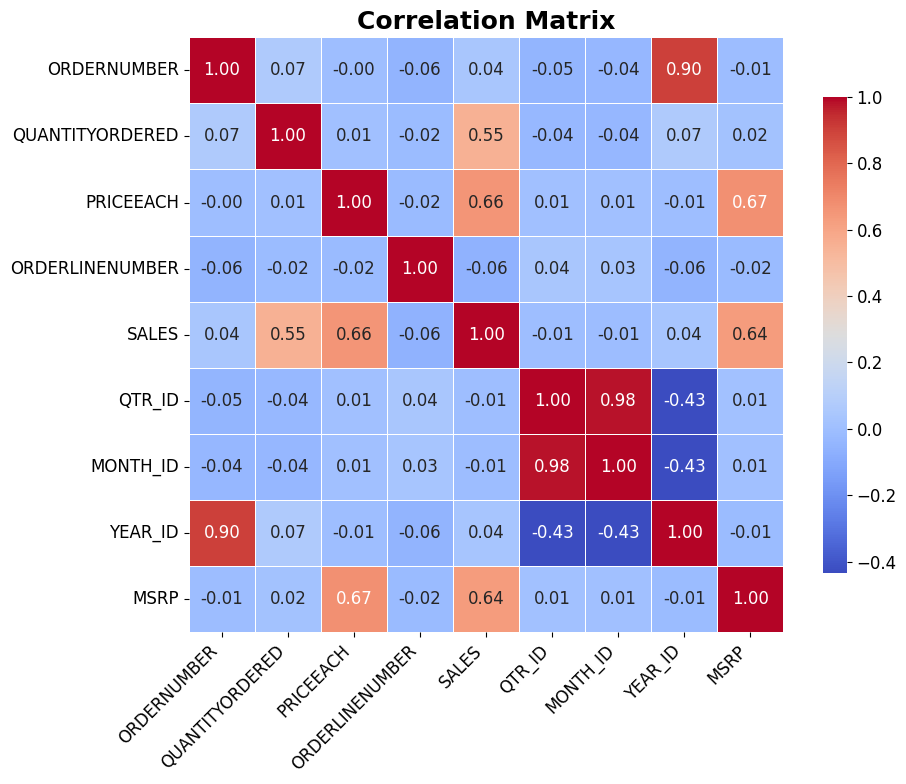

In [53]:
# Select only numeric columns from your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))  # Adjusted height for better visibility
corr_matrix = numeric_df.corr()

# Customize the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix', fontsize=18, fontweight='bold')  # Added title and increased font size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<br><br>
**OBSERVATIONS**
1. There is a strong positive correlation between ORDERNUMBER and YEAR_ID, indicating a significant association between the order number and the year in which the order was placed.

2. Similarly, there is a strong positive correlation between QTR_ID and MONTH_ID, suggesting a close relationship between the quarter and month identifiers, likely due to the sequential nature of time.

3. SALES, QUANTITYORDERED, PRICEEACH, and MSRP are highly positively correlated, indicating that higher sales revenue is typically associated with larger order quantities, higher prices per item, and higher manufacturer suggested retail prices.

4. Conversely, there is a strong negative correlation between YEAR_ID and both QTR_ID and MONTH_ID, implying an inverse relationship between the year and the quarter/month identifiers. This suggests that as the year increases, the quarter and month identifiers tend to decrease, reflecting the progression of time.
<br><br>